In [47]:
#Importing the necessary packages for this task\
# (Step 1: Creating and viewing a df for the db data from postgreSQL.
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import urllib.parse
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
database_name = 'TellCo'
table_name= 'xdr_data'

#Encoding my password since it has the @ symbol\ 
#which is the connection syntax used to separate\ 
#the username and the pasword from the hostname.
encoded_password = urllib.parse.quote("Sheila@49")
connection_params = {
    "host": "localhost",
    "user": "postgres",
    "password": encoded_password,
    "port": "5432",
    "database": "TellCo"
}
# Establish connection to the PostgreSQL database
engine = create_engine(
    f"postgresql+psycopg2://{connection_params['user']}:{connection_params['password']}"
    f"@{connection_params['host']}:{connection_params['port']}/{connection_params['database']}"
)


# Using the SQL SELECT command to retrieve the data from the database.
sql_query = 'SELECT * FROM xdr_data'
                       
#Creating a dataframe of the dtable data.
df = pd.read_sql(sql_query, con= engine)
                       
# Display the df in a more structured and visually appealing format.
print (df)

           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0       1823652.0  2.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

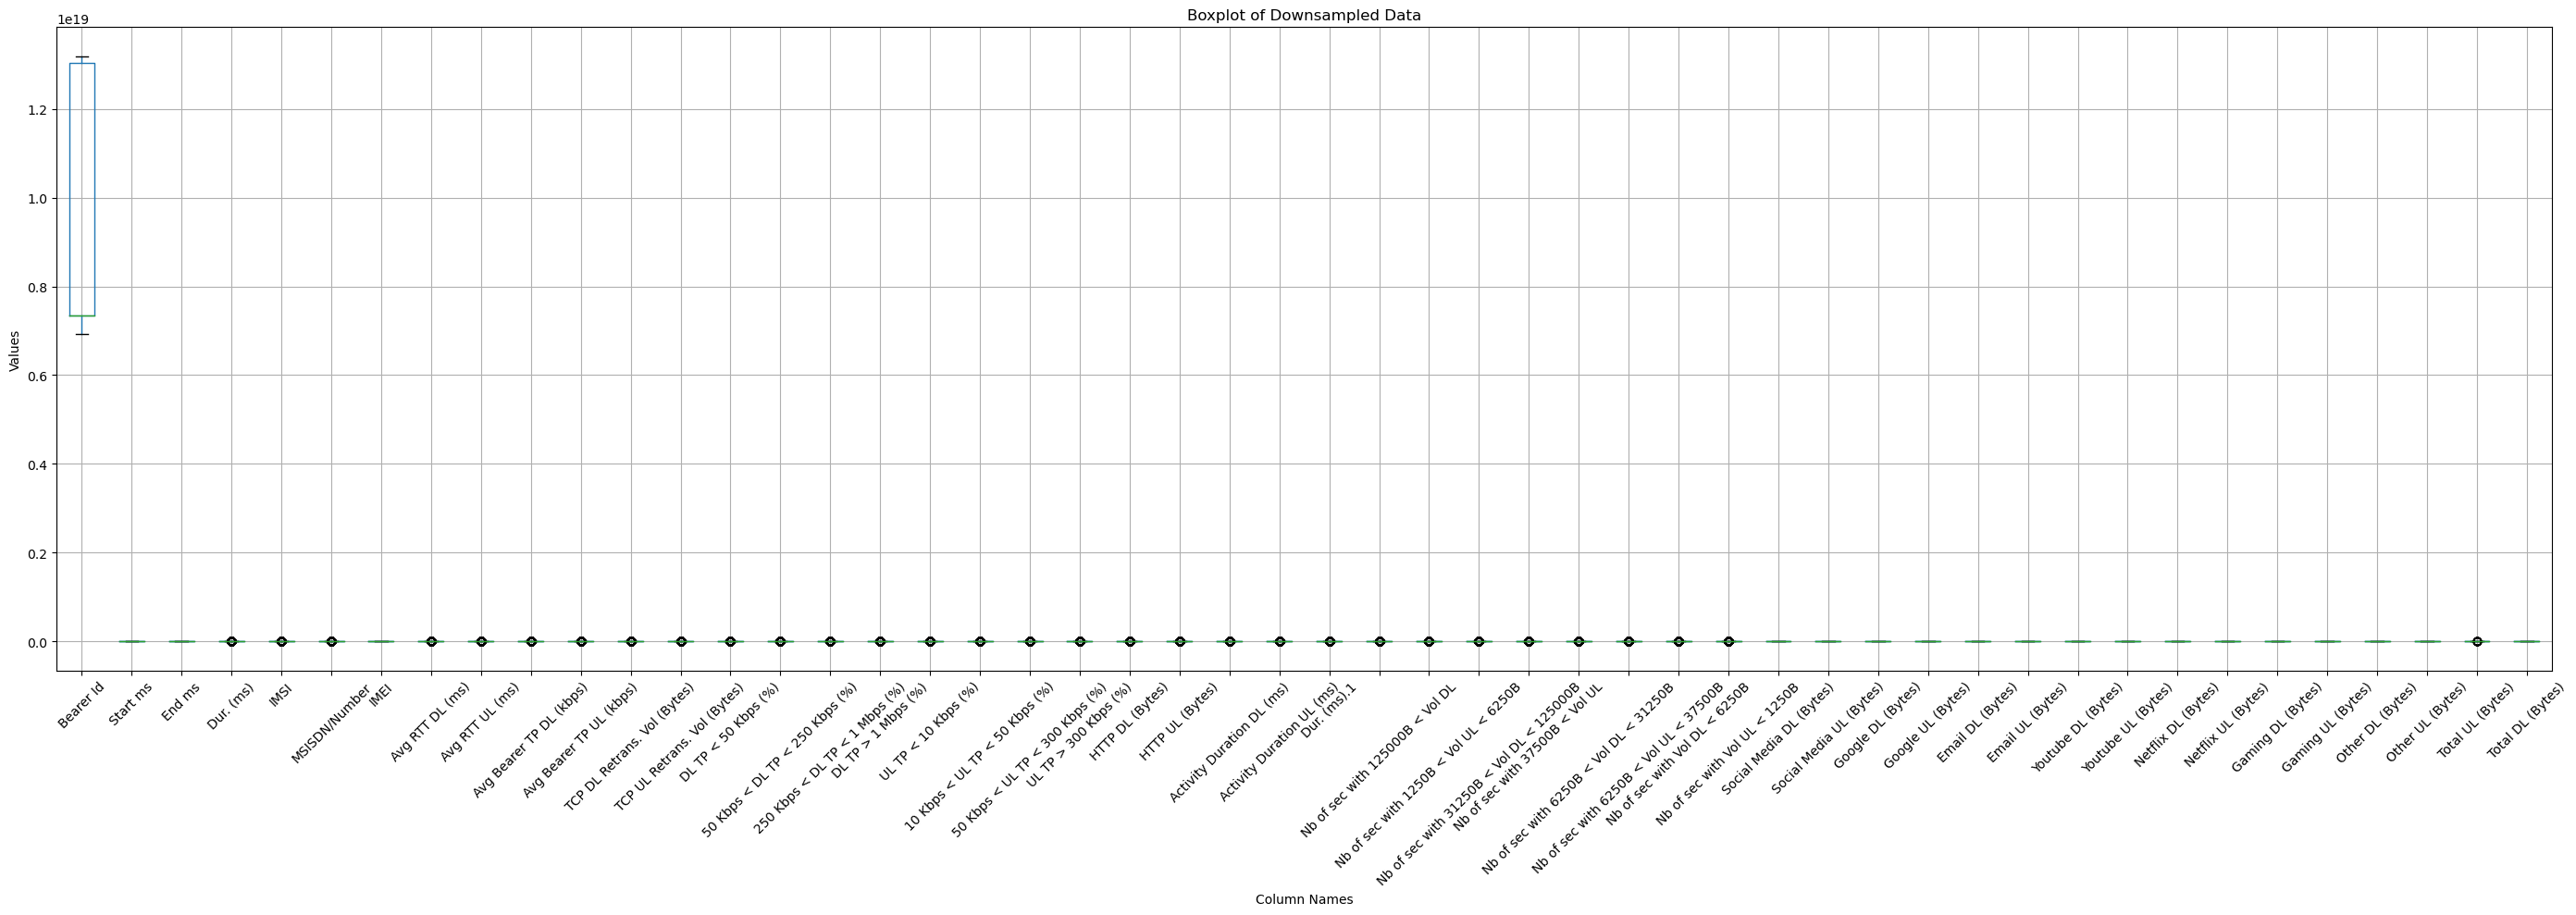

                                          Bearer Id  Start ms    End ms  \
Bearer Id                                  1.000000  0.002961 -0.001219   
Start ms                                   0.002961  1.000000  0.120945   
End ms                                    -0.001219  0.120945  1.000000   
Dur. (ms)                                  0.007515  0.001287 -0.001302   
IMSI                                       0.000152 -0.000054  0.000328   
MSISDN/Number                             -0.003307 -0.001021 -0.001890   
IMEI                                       0.164054 -0.001133 -0.000032   
Avg RTT DL (ms)                           -0.022561  0.004141 -0.005287   
Avg RTT UL (ms)                            0.034924 -0.002221 -0.002607   
Avg Bearer TP DL (kbps)                    0.063973 -0.000690  0.000694   
Avg Bearer TP UL (kbps)                    0.048123 -0.001268  0.000687   
TCP DL Retrans. Vol (Bytes)                0.019186  0.000328  0.004941   
TCP UL Retrans. Vol (Byte

In [50]:
# (Step 2) Visualizising the data properties. 
#All columns and their data types.
print (df.info())

#Obtaining the number of rows and columns of the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

#Descriptive analysis
df.describe ()
print (df.describe ())

#Finding the % of missing values in each column
# Step 1: Create a boolean mask for missing values
missing_values_mask = df.isna()

# Step 2: Count the number of missing values in each column
missing_values_count = missing_values_mask.sum()

# Step 3: Calculate the percentage of missing values
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Step 4: Print or display the results
print("Percentage of missing values in each column:")
print (missing_values_percentage)

#Identifying the nature of the outliers using the Box plot.
# Downsample the data by selecting every nth row.
n = 10  # Adjust the value of n as needed
downsampled_df = df.iloc[::n, :]

# Generate a boxplot for the downsampled data
plt.figure(figsize=(28, 10))
downsampled_df.boxplot()
plt.title('Boxplot of Downsampled Data')
plt.xlabel('Column Names')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Identifying the correlation between the columns
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)


# Print correlation matrix
print (correlation_matrix)


In [3]:
#Step 3: Data Cleaning.
#Data type corrections(changing object data types to string)
# Define data types for specific columns
dtype_mapping = {
    'Start': 'string',
    'End': 'string',
    'Last Location Name': 'string',
    'Handset Manufacturer': 'string',
    'Handset Type': 'string',
    
}

# Convert data types of specific columns
for column, data_type in dtype_mapping.items():
    df[column] = df[column].astype(data_type)
print(df.dtypes)

# Treating the missing values.
# Replace missing numerical values with column mean.
df.fillna(df.mean(numeric_only=True), inplace=True)
print (df.info())
# Replacing the missing text values with the column mode.
# Get only the string columns.
string_columns = df.select_dtypes(include=['string']).columns

# Calculate the mode for each string column.
mode_values = df[string_columns].mode().iloc[0]

# Fill null values in string columns with the mode for each column.
df[string_columns] = df[string_columns].fillna(mode_values)

# Check if any null values remain.
if df[string_columns].isnull().values.any():
    print("Some null values in string columns could not be filled.")
    
#Print new df.
print (df.info())

# Treating Outliers


Bearer Id                                   float64
Start                                        string
Start ms                                    float64
End                                          string
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           string
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [101]:
# Task 2:User Overview Analysis.
# Top 10 handsets used by customers.
top_10_handsets = df['Handset Type'].value_counts().head(10)
display (top_10_handsets)
print("\n")

# Top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)
print("\n")

# Top 5 handsets per top 3 handset manufacturer.
# Get the top 3 manufacturers.
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index.tolist()

# Create a DataFrame for each manufacturer and find the top 5 handsets.
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers:
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    top_5_handsets = manufacturer_df['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

# Print the results
for manufacturer, top_5_handsets in top_5_handsets_per_manufacturer.items():
    print(f"Manufacturer: {manufacturer}")
    print(top_5_handsets)

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: Int64



Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: Int64


Manufacturer: Apple
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: Int64
Manufacturer: Samsung
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: Int64
Manufacturer: Huawei
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: Int64


In [48]:
# Task 2.1
# Aggregate per user
user_aggregated = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Session duration
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Total DL (Bytes)': 'sum',  # Total download data
    'Social Media DL (Bytes)': 'sum',  # Total social media download data
    'Social Media UL (Bytes)': 'sum',  # Total social media upload data
    'Google DL (Bytes)': 'sum',  # Total Google download data
    'Google UL (Bytes)': 'sum',  # Total Google upload data
    # Add more columns as needed for other applications
})

# Rename columns for better understanding
user_aggregated = user_aggregated.rename(columns={
    'Bearer Id': 'Num_XDR_Sessions',
    'Dur. (ms)': 'Session_Duration',
    'Total UL (Bytes)': 'Total_UL_Data',
    'Total DL (Bytes)': 'Total_DL_Data',
    'Social Media DL (Bytes)': 'Social_Media_DL',
    'Social Media UL (Bytes)': 'Social_Media_UL',
    'Google DL (Bytes)': 'Google_DL',
    'Google UL (Bytes)': 'Google_UL',
    
})
print (user_aggregated)


               Num_XDR_Sessions  Session_Duration  Total_UL_Data  \
MSISDN/Number                                                      
3.360100e+10                  1          116720.0     36053108.0   
3.360100e+10                  1          181230.0     36104459.0   
3.360100e+10                  1          134969.0     39306820.0   
3.360101e+10                  1           49878.0     20327526.0   
3.360101e+10                  2           37104.0     94280527.0   
...                         ...               ...            ...   
3.379000e+10                  1            8810.0     26716429.0   
3.379000e+10                  1          140988.0     35732243.0   
3.197021e+12                  1          877385.0     37295915.0   
3.370000e+14                  1          253030.0     56652839.0   
8.823971e+14                  1          869844.0     60456049.0   

               Total_DL_Data  Social_Media_DL  Social_Media_UL   Google_DL  \
MSISDN/Number                        

Dispersion Parameters:
          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e

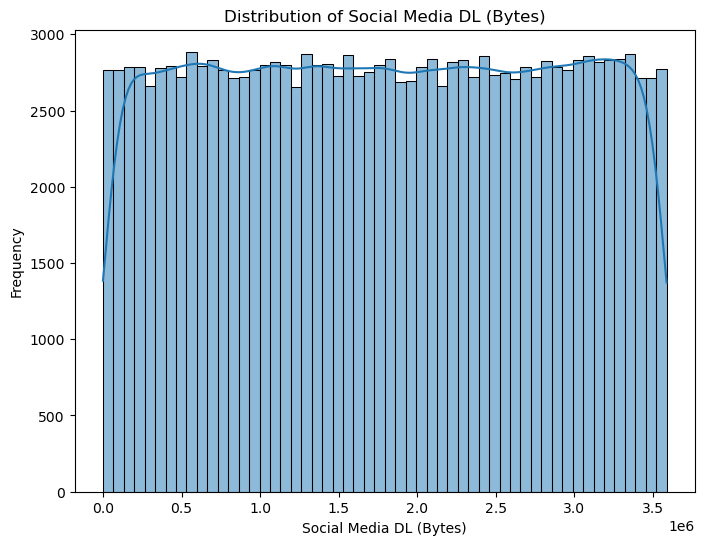

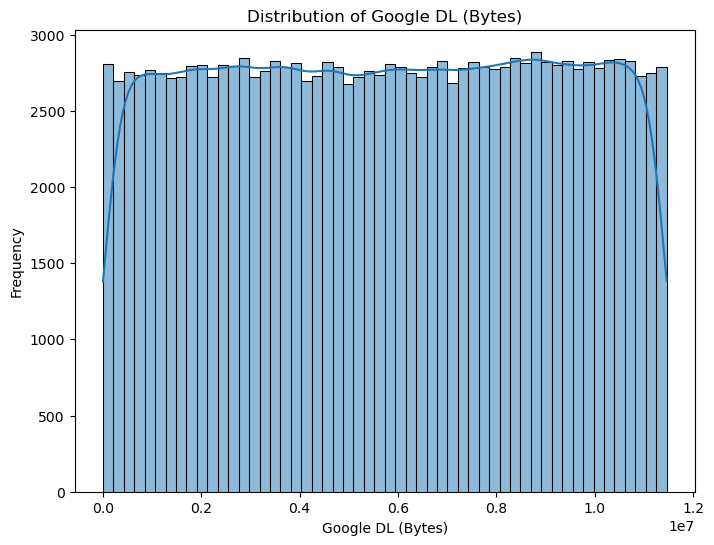

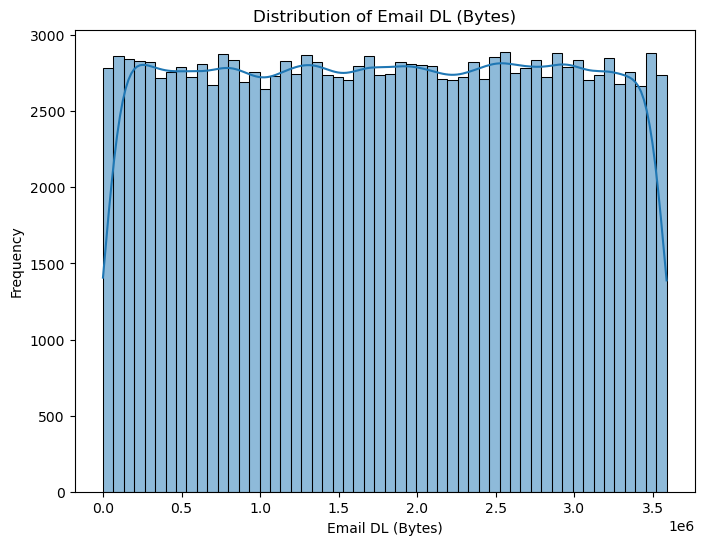

In [ ]:
#Task 2.2.
# Non-Graphical Univariate Analysis
dispersion_parameters = df.describe()
print("Dispersion Parameters:")
print (dispersion_parameters)

# Graphical Univariate Analysis
def plot_univariate_analysis(data, column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
# Choose the columns for univariate analysis (replace with your column names)
columns_for_univariate_analysis = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)']
for column in columns_for_univariate_analysis:
    plot_univariate_analysis(df, column)

# Bivariate Analysis
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)','Social Media UL (Bytes)', 
                 'Google UL (Bytes)', 'Email UL (Bytes)','Total DL (Bytes)', 'Total UL (Bytes)']])
plt.title("Pairplot of Variables")
plt.show()

# Variable Transformations
# We'll create a new column for total duration as an example
df['Total Duration'] = df['Dur. (ms)'] / 1000  # Assuming 'Dur. (ms)' represents duration in milliseconds, converting to seconds

# Then, we'll create deciles based on this new column
df['Total Duration Deciles'] = pd.qcut(df['Total Duration'], q=5, labels=False)

# Group by the decile classes and calculate the sum of 'Total DL (Bytes)' and 'Total UL (Bytes)' for each decile class
total_data_per_decile = df.groupby('Total Duration Deciles')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

print("Total Data (DL+UL) per Decile Class:")
print(total_data_per_decile)

# Select the relevant columns for correlation analysis
selected_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                    'Other DL (Bytes)']

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print (correlation_matrix)

#PCA 
from sklearn.preprocessing import StandardScaler
# Drop non-numeric columns if necessary
numeric_df = df.select_dtypes(include=['number'])

# Impute missing values if necessary
numeric_df.fillna(0, inplace=True)  # Replace missing values with zeros

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Perform PCA
pca = PCA(n_components=3)  # Specify the number of components
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the principal components DataFrame with the original DataFrame
result_df = pd.concat([df, principal_df], axis=1)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the transformed DataFrame with principal components
print("Transformed DataFrame with Principal Components:")
print(result_df[['PC1', 'PC2', 'PC3']])


Top 10 customers per engagement metric:
{'Num_XDR_Sessions':                Num_XDR_Sessions  Session_Duration  Total_UL_Data  \
MSISDN/Number                                                      
4.188282e+10               1066      7.255100e+07   4.436642e+10   
3.362632e+10                 18      8.791927e+06   6.696507e+08   
3.361489e+10                 17      9.966898e+06   6.894830e+08   
3.362578e+10                 17      1.855375e+07   7.295774e+08   
3.365973e+10                 16      4.035428e+06   6.242603e+08   
3.367588e+10                 15      4.865947e+06   5.815688e+08   
3.376054e+10                 15      9.279434e+06   7.034786e+08   
3.366716e+10                 13      8.744914e+06   5.663264e+08   
3.360313e+10                 12      6.287761e+06   4.355876e+08   
3.360452e+10                 12      5.207990e+06   3.917759e+08   

               Total_DL_Data  Social_Media_DL  Social_Media_UL     Google_DL  \
MSISDN/Number                             

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Normalized Metrics with Cluster Labels:
               Num_XDR_Sessions  Session_Duration  Total_UL_Data  \
MSISDN/Number                                                      
3.360100e+10           0.000000          0.001511       0.000748   
3.360100e+10           0.000000          0.002400       0.000749   
3.360100e+10           0.000000          0.001762       0.000821   
3.360101e+10           0.000000          0.000589       0.000394   
3.360101e+10           0.000939          0.000413       0.002061   
...                         ...               ...            ...   
3.379000e+10           0.000000          0.001845       0.000741   
4.188282e+10           1.000000          1.000000       1.000000   
3.197021e+12           0.000000          0.011996       0.000776   
3.370000e+14           0.000000          0.003390       0.001212   
8.823971e+14           0.000000          0.011892       0.001298   

               Total_DL_Data  Social_Media_DL  Social_Media_UL  Google_DL  

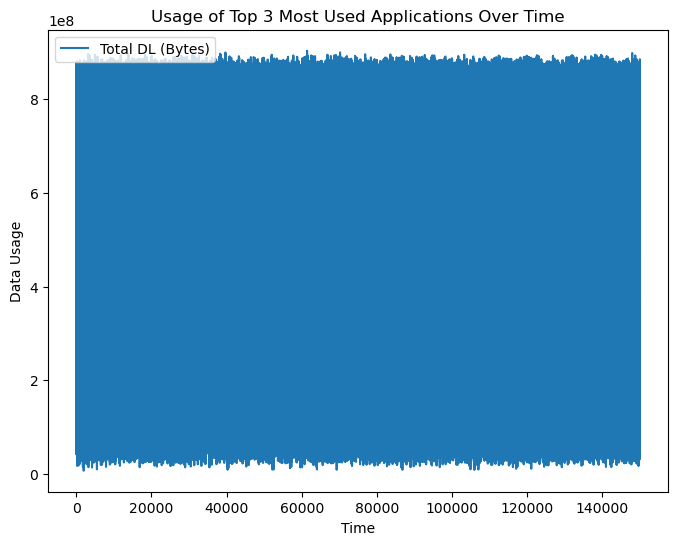

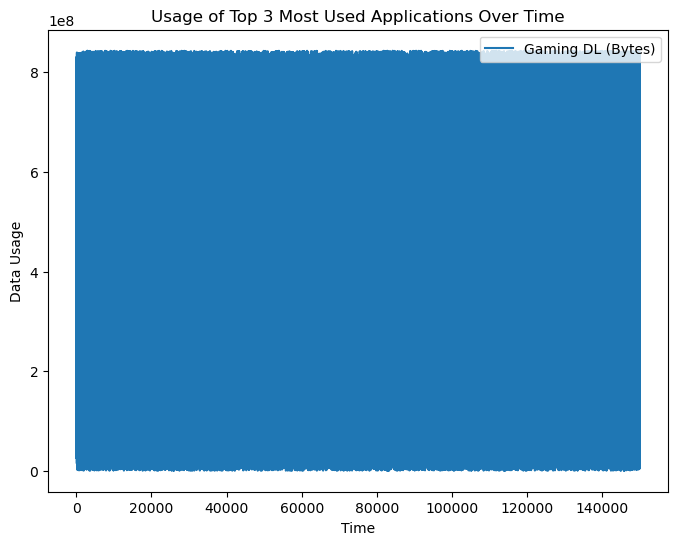

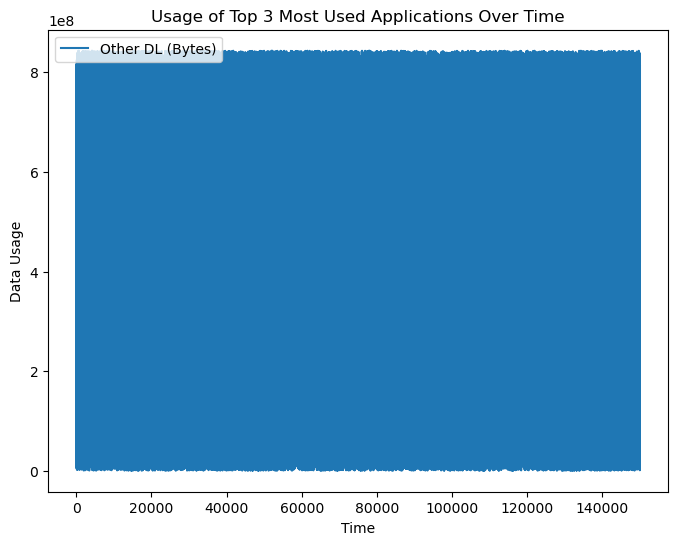

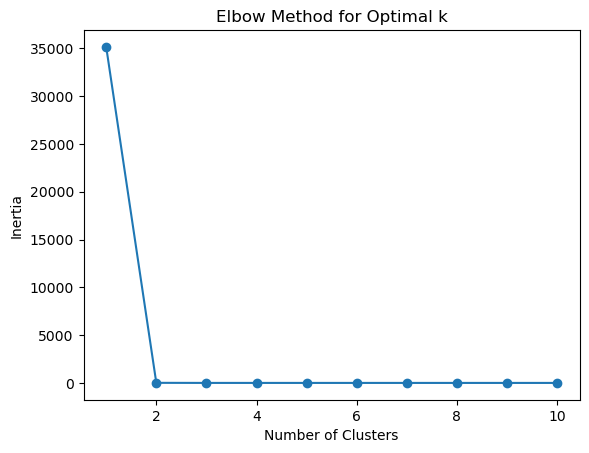

In [39]:
# Task 3.1
# Report top 10 customers per engagement metric
top_10_customers_per_metric = {}
for column in user_aggregated.columns:
    top_10_customers_per_metric[column] = user_aggregated.nlargest(10, column)

print("Top 10 customers per engagement metric:")
top = top_10_customers_per_metric
print (top_10_customers_per_metric)
print("\n")


# Normalize engagement metrics
normalized_metrics = (user_aggregated - user_aggregated.min()) / (user_aggregated.max() - user_aggregated.min())

# Run k-means clustering with k=3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(normalized_metrics)

# Add cluster labels to the DataFrame
normalized_metrics['Cluster'] = clusters

# Display the normalized metrics with cluster labels
print("Normalized Metrics with Cluster Labels:")
print(normalized_metrics)
print("\n")

# Compute metrics for each cluster
cluster_metrics = normalized_metrics.groupby('Cluster').agg(['min', 'max', 'mean', 'sum'])
print("Metrics for Each Cluster:")
print(cluster_metrics)
print("\n")

# Aggregate total traffic per application for each user
total_traffic_per_app = df.groupby('MSISDN/Number')[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)']].sum()

# Derive top 10 most engaged users per application
top_10_users_per_app = {}
for column in total_traffic_per_app.columns:
    top_10_users_per_app[column] = total_traffic_per_app.nlargest(10, column)
print("Top 10 Users per Application:")
print (top_10_users_per_app)

# Aggregate user total traffic per application
total_traffic_per_app = df.iloc[:, 39:-2].sum()  # Assuming the columns containing application data start from index 30
top_3_apps = total_traffic_per_app.nlargest(3).index

# Plot the line graphs for the top 3 most used applications
for app in top_3_apps:
    plt.figure(figsize=(8, 6))
    plt.plot(df.index, df[app], label=app)
    plt.title("Usage of Top 3 Most Used Applications Over Time")
    plt.xlabel("Time")
    plt.ylabel("Data Usage")
    plt.legend()
    plt.show()
# Determine the optimal value of k using the elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)  # Set n_init explicitly
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


